# 활성함수

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

**sigmoid**

In [17]:
x = np.arange(-6, 6, 0.1)

In [16]:
def sigmoid(x) : 
    y = 1 / (1+np.exp(-x))
    return y

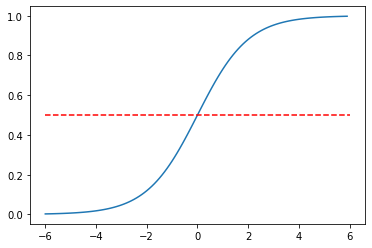

In [46]:
plt.plot(x, sigmoid(x))
plt.plot([-6, 6], [0.5, 0.5], 'r--')

**step function**

In [38]:
def step_function(x) : 
    y = x > 0
    return y.astype(np.int)

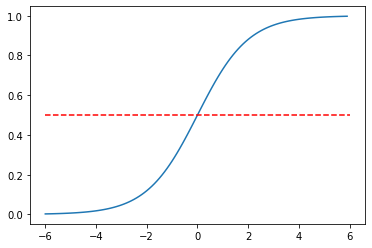

In [47]:
plt.plot(x, sigmoid(x))
plt.plot([-6, 6], [0.5, 0.5], 'r--')

**sigmoid와 step function 비교**

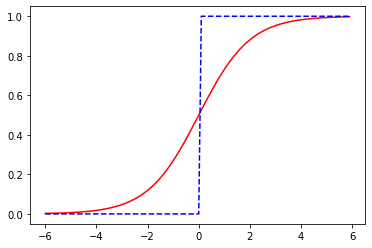

In [44]:
plt.plot(x, sigmoid(x), 'r-')
plt.plot(x, step_function(x), 'b--')

**ReLU**

In [55]:
def relu(x) :
    return np.maximum(0, x)

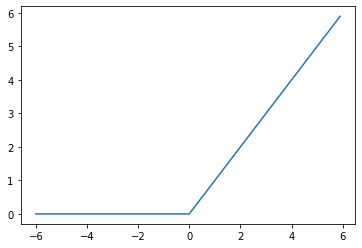

In [56]:
plt.plot(x, relu(x))

# 신경망에서의 행렬곱

<center>
$\begin{bmatrix}1&2 \end{bmatrix}
\begin{bmatrix}1&3&5\\2&4&6 \end{bmatrix}
=
\begin{bmatrix}5&7&11\end{bmatrix}$
<center\>

In [64]:
X = np.array([1, 2])
print(X)
X.shape

[1 2]


(2,)

In [63]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [62]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 각 층의 신호 전달 구현

<center>
    $a_{1}^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_{1}^{(1)}$
</center>
$\text{}$
<center>
    $\mathbf{A}^{(1)} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)}$
</center>

<center>
    $\mathbf{A}^{(1)} = \begin{pmatrix}a_1^{(1)}&a_2^{(1)}&a_3^{(1)} \end{pmatrix},
    \mathbf{X} = \begin{pmatrix}x_1&x_2 \end{pmatrix},
    \mathbf{B}^{(1)} = \begin{pmatrix}b_1^{(1)}&b_2^{(1)}&b_3^{(1)} \end{pmatrix}$
</center>
$\text{}$

<center>
    $\mathbf{W}^{(1)} = \begin{pmatrix}w_{11}^{(1)}&w_{11}^{(1)}&w_{11}^{(1)}\\w_{11}^{(2)}&w_{11}^{(2)}&w_{11}^{(2)} \end{pmatrix}$
</center>

In [65]:
X = np.array([1.0, 0.5])
W1 = np.array([[.1, .3, .5],
               [.2, .4, .6]])
B1 = np.array([.1, .2, .3])

In [66]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


입력층에서 가중치를 곱해준 후 bias 더해준 값이 1층으로 전달

In [69]:
A1 = np.dot(X, W1) + B1 
A1

array([0.3, 0.7, 1.1])

1층으로 전달된 값이 활성함수를 통과하면 1층의 값이 된다\
<center>
$h(a) = z$

In [70]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

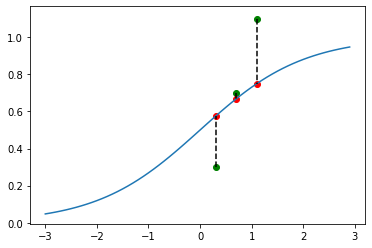

In [90]:
x = np.arange(-3, 3, .1)
plt.scatter(A1, A1, color = 'green')
plt.plot(x, sigmoid(x))
plt.scatter(A1, sigmoid(A1), color = 'red')
plt.plot([A1[0], A1[0]], [A1[0], Z1[0]], 'k--')
plt.plot([A1[1], A1[1]], [A1[1], Z1[1]], 'k--')
plt.plot([A1[2], A1[2]], [A1[2], Z1[2]], 'k--')

**1층에서 2층으로 전달**

In [91]:
W2 = np.array([[.1, .4], 
               [.2, .5],
               [.3, .6]])
B2 = np.array([.1, .2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [93]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

**2층에서 출력층으로 전달**

출력할 때는 활성함수가 달라짐

In [94]:
def identity_function(x) : 
    return x

In [95]:
W3 = np.array([[.1, .3],
               [.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [96]:
# output
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

## 구현 정리 - 순전파

In [104]:
# 가중치와 편향을 초기화하고 딕셔너리 network에 저장
def init_network() :
    network = {}
    network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]])
    network['b1'] = np.array([.1, .2, .3])
    network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['b3'] = np.array([.1, .2])
    
    return network

# 입력 신호를 출력 신호로 변환하는 처리 과정
def forward(network, x) : 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2 
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y 

In [105]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 소프트맥스 함수

<center>
    $y_k = \dfrac{\text{exp}}{\sum_{i=1}^{n}\text{exp}(a_i)}$
<center>